In [4]:
import numpy as np
import pandas as pd

## `np.bincoun`

每个 `bin` 给出了它的索引值在 `x` 中出现的次数:

In [5]:
x = np.array([0, 1, 1, 3, 2, 1, 7])
b = np.bincount(x)
b

array([1, 3, 1, 1, 0, 0, 0, 1], dtype=int64)

我们可以看到 `x` 中最大的数为 `7`，因此 bin 的数量为 `8`，那么它的索引值为 $0 \sim 7$，对应关系是：

In [8]:
pd.DataFrame(data=b, columns=['bin']).T

,0,1,2,3,4,5,6,7
bin,1,3,1,1,0,0,0,1


如果 `weights` 参数被指定，那么 `x` 会被它加权，也就是说，如果值 `n` 发现在位置 `i`，那么 `out[n] += weight[i]` 而不是 `out[n] += 1`.因此，我们 `weights` 的大小必须与x相同，否则报错。下面，我举个例子让大家更好的理解一下：

In [9]:
w = np.array([0.3, 0.5, 0.2, 0.7, 1., -0.6])
# 我们可以看到 x 中最大的数为 4，因此 bin 的数量为 5，那么它的索引值为 0->4
x = np.array([2, 1, 3, 4, 4, 3])
# 索引0 -> 0
# 索引1 -> w[1] = 0.5
# 索引2 -> w[0] = 0.3
# 索引3 -> w[2] + w[5] = 0.2 - 0.6 = -0.4
# 索引4 -> w[3] + w[4] = 0.7 + 1 = 1.7
np.bincount(x, weights=w)

array([ 0. ,  0.5,  0.3, -0.4,  1.7])

最后，我们来看一下 `minlength` 这个参数。文档说，如果 `minlength` 被指定，那么输出数组中 `bin` 的数量至少为它指定的数（如果必要的话，`bin` 的数量会更大，这取决于 `x`）。下面，我举个例子让大家更好的理解一下：

In [10]:
# 我们可以看到x中最大的数为 3，因此 bin 的数量为4，那么它的索引值为 0->3
x = np.array([3, 2, 1, 3, 1])
# 本来bin的数量为4，现在我们指定了参数为7，因此现在bin的数量为7，所以现在它的索引值为0->6
np.bincount(x, minlength=7)

array([0, 2, 1, 2, 0, 0, 0], dtype=int64)

In [11]:
# 我们可以看到x中最大的数为3，因此bin的数量为4，那么它的索引值为0->3
x = np.array([3, 2, 1, 3, 1])
# 本来bin的数量为4，现在我们指定了参数为1，那么它指定的数量小于原本的数量，因此这个参数失去了作用，索引值还是0->3
np.bincount(x, minlength=1)

array([0, 2, 1, 2], dtype=int64)

## `np.unique`

`np.unique`: Find the unique elements of an array.

In [13]:
np.unique([1, 1, 2, 2, 3, 3])

array([1, 2, 3])

In [14]:
a = np.array([[1, 0, 0], [1, 0, 0], [2, 3, 4]])
np.unique(a, axis=0)

array([[1, 0, 0],
       [2, 3, 4]])

In [15]:
a = np.array(['a', 'b', 'b', 'c', 'a'])
u, indices = np.unique(a, return_index=True)
u

array(['a', 'b', 'c'], dtype='<U1')

In [16]:
indices

array([0, 1, 3], dtype=int64)

In [17]:
a = np.array([1, 2, 6, 4, 2, 3, 2])
u, indices = np.unique(a, return_inverse=True)
u

array([1, 2, 3, 4, 6])

In [18]:
indices

array([0, 1, 4, 3, 1, 2, 1], dtype=int64)

In [19]:
u[indices]

array([1, 2, 6, 4, 2, 3, 2])

## 一个实例

以感知机为例来说明，如何组合使用各种 Python 函数。

In [20]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]    # 为了可视化方便, 这里仅仅选用两种特征
y = iris.target

# 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica
print('Class labels:', np.unique(y))  # 返回存储数据的类标

Class labels: [0 1 2]


### 划分数据集

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

# 查看数据分布是否均衡
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


### 特征缩放

**需要注意的是: 我们要使用相同的缩放参数来处理训练和测试数据, 以保证它们的值是彼此相当的.**

In [24]:
from sklearn.preprocessing import StandardScaler

# 标准化处理
sc = StandardScaler()  
sc.fit(X_train)   # 计算数据中的每个特征的样本均值和标准差
X_train_std = sc.transform(X_train)   # 使用样本均值和标准差做标准化处理
X_test_std = sc.transform(X_test)

In [25]:
# 感知机
from sklearn.linear_model import Perceptron

# random_state 每次迭代后初始化重排训练数据集
ppn = Perceptron(tol=40, eta0=0.1, random_state=1)   # tol 迭代次数，eta0 学习率
ppn.fit(X_train_std, y_train)   # 训练模型

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=1, shuffle=True, tol=40,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [26]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 20


在 `mertrics` 模块中实现了许多不同的性能矩阵, 如

In [27]:
from sklearn.metrics import accuracy_score

# y_test 真实的类标, y_pred 预测的类标
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.56


### 绘制模型的决策区域

使用小圆圈来高亮显示测试数据

In [28]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=cl,
            edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c='',
            edgecolor='black',
            alpha=1.0,
            linewidth=1,
            marker='o',
            s=100,
            label='test set')

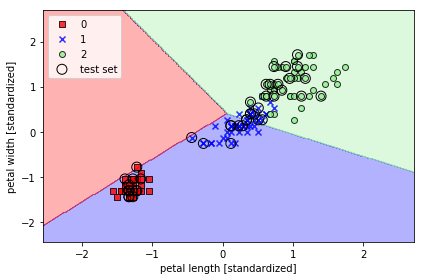

In [29]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()